Q1

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image1 = cv2.imread('image1.jpg')
image2 = cv2.imread('image2.jpg')

In [6]:
image1.shape,image2.shape

((401, 600, 3), (479, 600, 3))

In [9]:
image2 = cv2.resize(image2, (image1.shape[0], image1.shape[1]),
                   interpolation=cv2.INTER_LINEAR)


In [10]:
channels_image1 = cv2.split(image1)
channels_image2 = cv2.split(image2)

In [11]:
for i in range(3):
    plt.hist(channels_image1[i].ravel(), 256, [0, 256], color='r', alpha=0.5)
    plt.hist(channels_image2[i].ravel(), 256, [0, 256], color='b', alpha=0.5)
    plt.title(f'Channel {i+1} Histogram')
    plt.legend(['Image1', 'Image2'])
    plt.show()


In [12]:
equalized_image1 = cv2.merge([cv2.equalizeHist(channels_image1[i], channels_image2[i]) for i in range(3)])


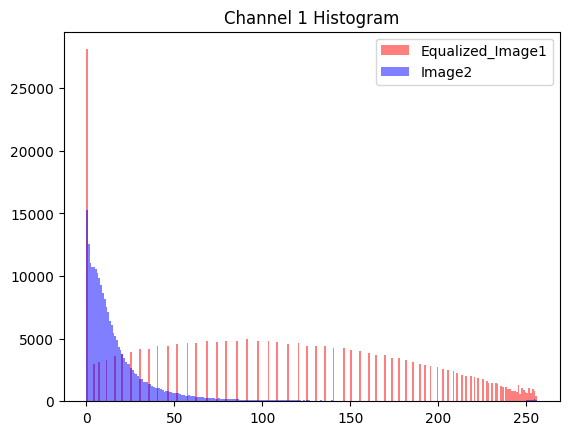

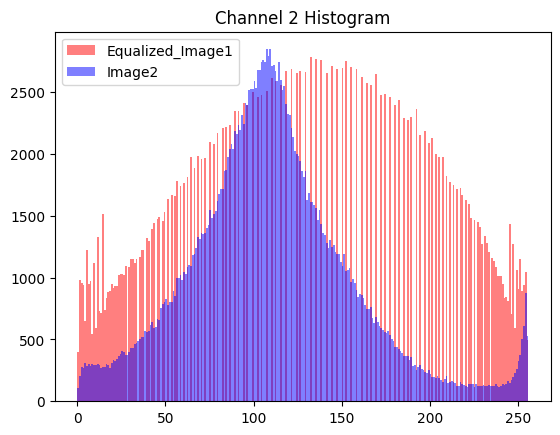

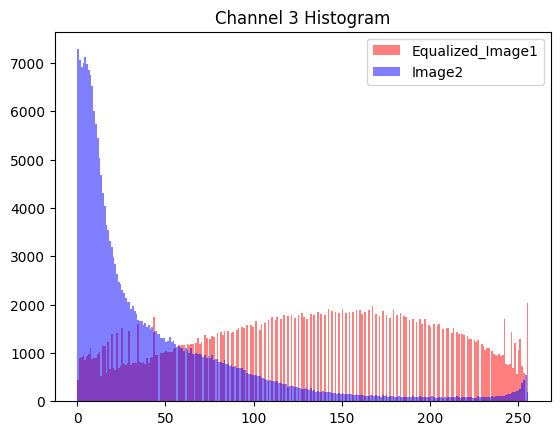

In [13]:
e_channels_image1 = cv2.split(equalized_image1)
for i in range(3):
    plt.hist(e_channels_image1[i].ravel(), 256, [0, 256], color='r', alpha=0.5)
    plt.hist(channels_image2[i].ravel(), 256, [0, 256], color='b', alpha=0.5)
    plt.title(f'Channel {i+1} Histogram')
    plt.legend(['Equalized_Image1', 'Image2'])
    plt.show()


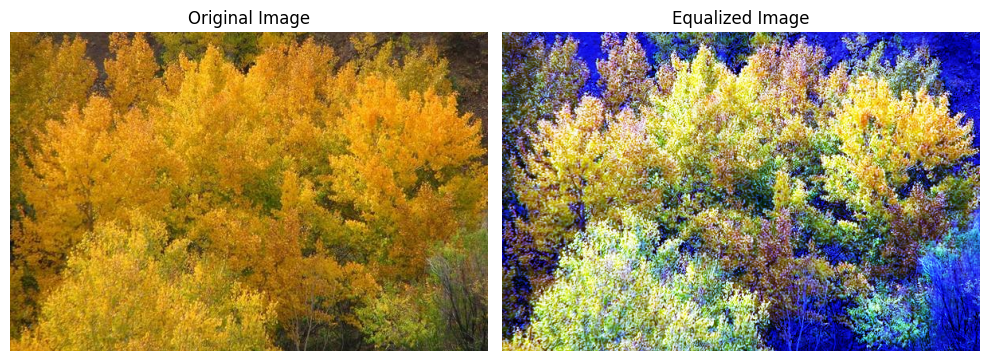

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(equalized_image1, cv2.COLOR_BGR2RGB))
axes[1].set_title('Equalized Image')
axes[1].axis('off')
# Adjust layout
plt.tight_layout()
# Display the plot
plt.show()

Q2

In [15]:
image = cv2.imread('chestxray1.png', cv2.IMREAD_GRAYSCALE)

In [16]:
clahe = cv2.createCLAHE(clipLimit = 10)

Text(0.5, 1.0, 'contrast limited AHE with clipLimit = 10')

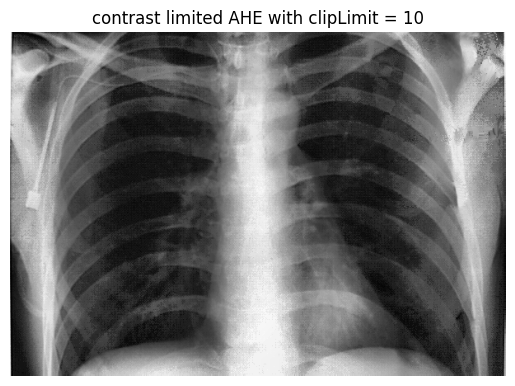

In [19]:
plt.imshow(clahe.apply(image), cmap = 'gray')
plt.axis('off')
plt.title('contrast limited AHE with clipLimit = 10')

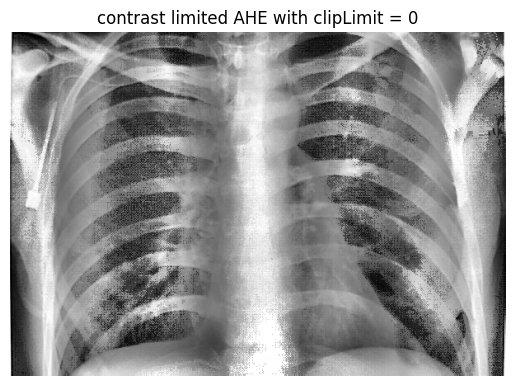

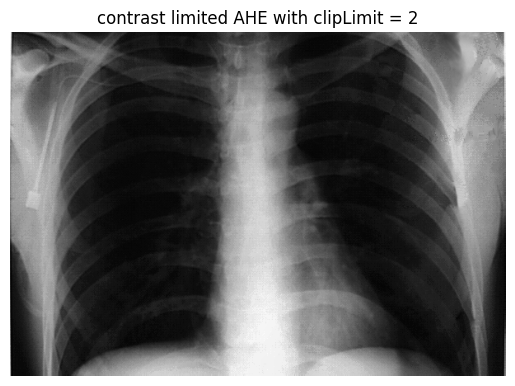

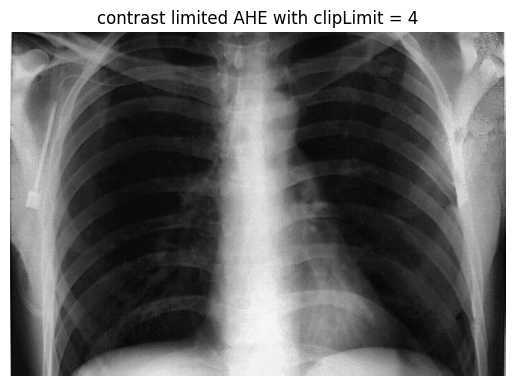

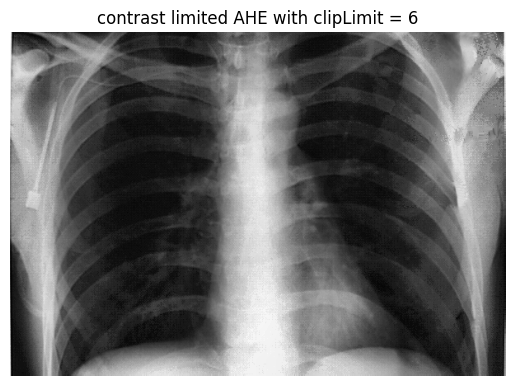

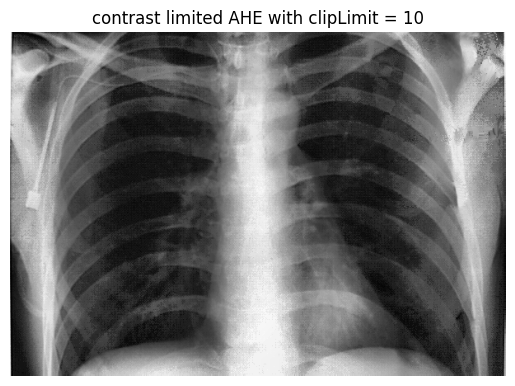

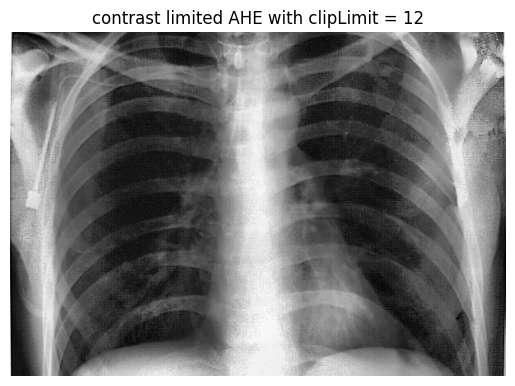

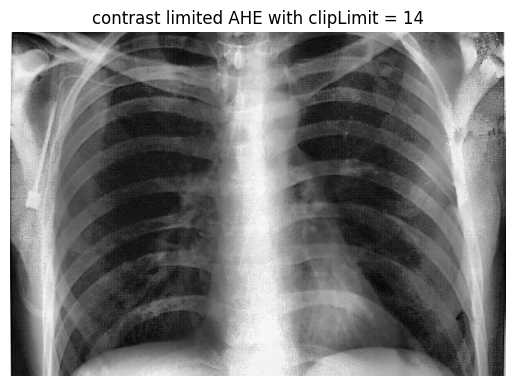

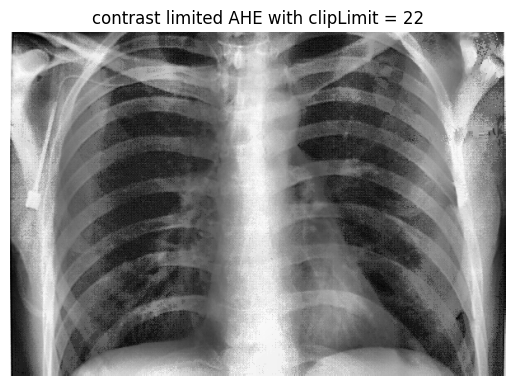

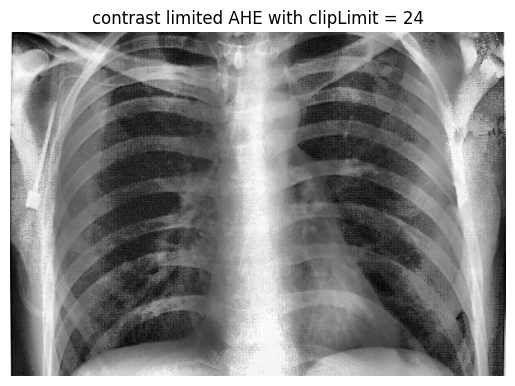

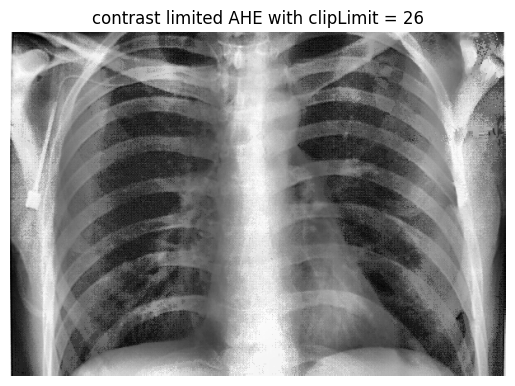

In [20]:
for i in range(0, 30, 2):
    clahe = cv2.createCLAHE(clipLimit=i)
    plt.imshow(clahe.apply(image), cmap='gray')
    plt.axis('off')
    plt.title(f"contrast limited AHE with clipLimit = {i}")
    plt.show()


In [21]:
def sliding_window_ahe(image, k=5):
    if k % 2 != 1:
        k = k + 1
    img = image.copy()
    result = image.copy()
    img = cv2.copyMakeBorder(img, k // 2, k // 2, 0, 0, cv2.BORDER_CONSTANT, value=0)
    for i in range(k // 2, image.shape[0] + (k // 2)):
        patch_equalized = cv2.equalizeHist(img[i - (k // 2): i + (k // 2) + 1, :])
        result[i - (k // 2), :] = patch_equalized[(k // 2) + 1, :]
    return result


In [22]:
swahe_image = sliding_window_ahe(image, k=125)

In [23]:
plt.imshow(swahe_image, cmap = 'gray')
plt.axis('off')
plt.title(f"SWAHE Image")
plt.show()

In [24]:
part1 = image[:image.shape[0]//2, :image.shape[1]//2 ]
part2 = image[image.shape[0]//2:, :image.shape[1]//2 ]
part3 = image[image.shape[0]//2:, image.shape[1]//2: ]
part4 = image[:image.shape[0]//2, image.shape[1]//2: ]

In [26]:
part1_e = cv2.equalizeHist(part1)
part2_e = cv2.equalizeHist(part2)
part3_e = cv2.equalizeHist(part3)
part4_e = cv2.equalizeHist(part4)

In [27]:
new_img1 = np.hstack([part1_e, part4_e])
new_img2 = np.hstack([part2_e, part3_e])
block_img = np.vstack([new_img1, new_img2])

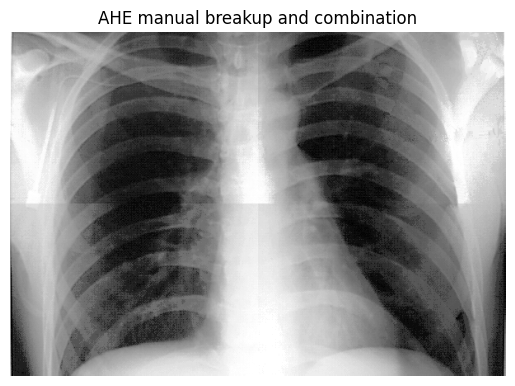

In [28]:
plt.imshow(block_img, cmap = 'gray')
plt.axis('off')
plt.title("AHE manual breakup and combination")
plt.show()

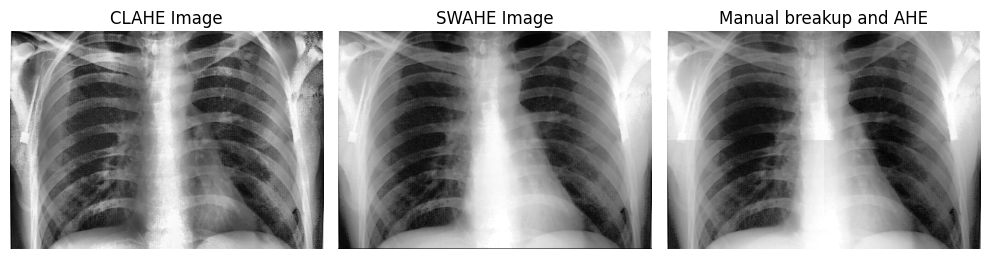

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(clahe.apply(image), cmap = 'gray')
axes[0].set_title('CLAHE Image')
axes[0].axis('off')
axes[1].imshow(swahe_image, cmap = 'gray')
axes[1].set_title('SWAHE Image')
axes[1].axis('off')
axes[2].imshow(block_img, cmap = 'gray')
axes[2].set_title('Manual breakup and AHE')
axes[2].axis('off')
# Adjust layout
plt.tight_layout()
# Display the plot
plt.show()

Q3

In [30]:
def intensity_slicing(image, start, end, rest='original'):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] >= start and image[i, j] <= end:
                img[i, j] = image[i, j] + np.sqrt(((image[i, j] - start)**2) * ((end - image[i, j])**2))
            else:
                if rest == 'zero':
                    return img


In [43]:
im_range = [100, 135]
in_image_zero = intensity_slicing(image, im_range[0], im_range[1], rest='zero')
in_image_org = intensity_slicing(image, im_range[0], im_range[1], rest='original')
in_image_org = in_image_org.astype(np.uint8)



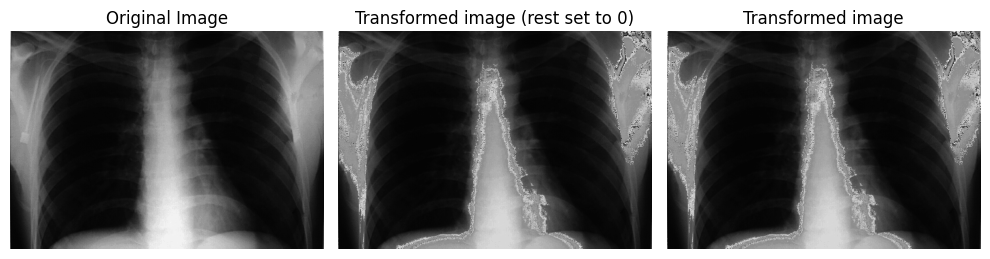

In [45]:

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(image, cmap = 'gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(in_image_zero, cmap = 'gray')
axes[1].set_title('Transformed image (rest set to 0)')
axes[1].axis('off')
axes[2].imshow(in_image_org, cmap = 'gray')
axes[2].set_title('Transformed image')
axes[2].axis('off')
# Adjust layout
plt.tight_layout()
# Display the plot
plt.show()

256


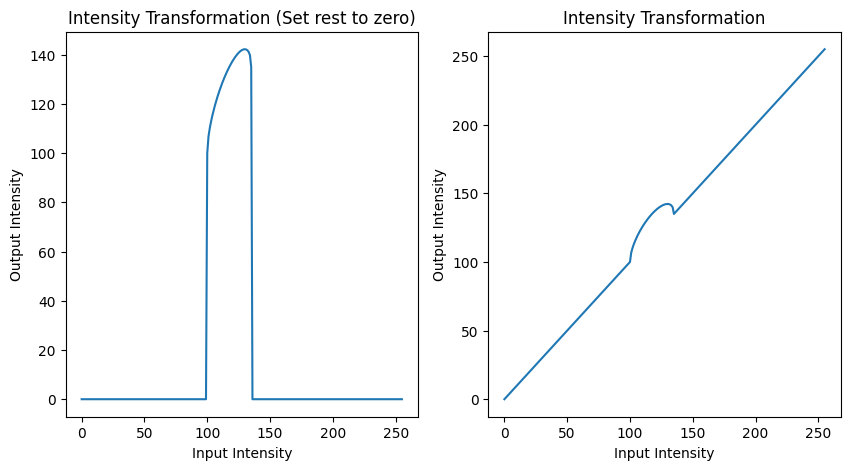

In [47]:
x = list(range(256))
int_trans_zero = [i + np.sqrt((i - 100) * (135 - i)) if (i >= 100 and i <= 135) else 0 for i in x]
int_trans = [i + np.sqrt((i - 100) * (135 - i)) if (i >= 100 and i <= 135) else i for i in x]

print(len(int_trans))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(x, int_trans_zero)
axes[0].set_title('Intensity Transformation (Set rest to zero)')
axes[0].set_xlabel('Input Intensity')
axes[0].set_ylabel('Output Intensity')

axes[1].plot(x, int_trans)
axes[1].set_title('Intensity Transformation')
axes[1].set_xlabel('Input Intensity')
axes[1].set_ylabel('Output Intensity')

plt.show()


Q4

In [48]:
bit_images = {}
bits = range(8)
img = image.copy()

for i in bits:
    temp = np.zeros(img.shape)
    temp = temp + np.where(img >= 2**i - 1, img, 0) - np.where(img < 2**(i+1) - 1, img, 0)
    bit_images['bitplane' + str(i)] = temp


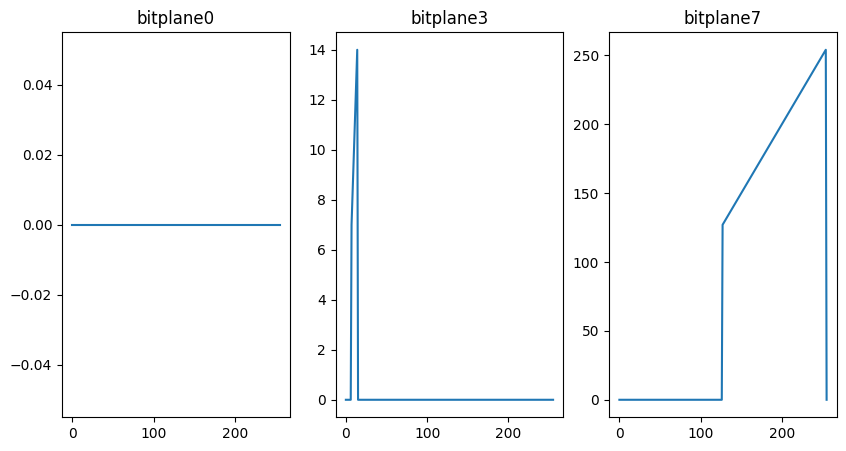

In [49]:
x = np.array(range(256))
bit_trans = {}

for i in [0, 3, 7]:
    bit_trans['bitplane' + str(i)] = x - np.where(x < 2**i - 1, x, 0) - np.where(x >= 2**(i+1) - 1, x, 0)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
j = 0
for i in bit_trans:
    axes[j].plot(x, bit_trans[i])
    axes[j].set_title(i)
    j = j + 1


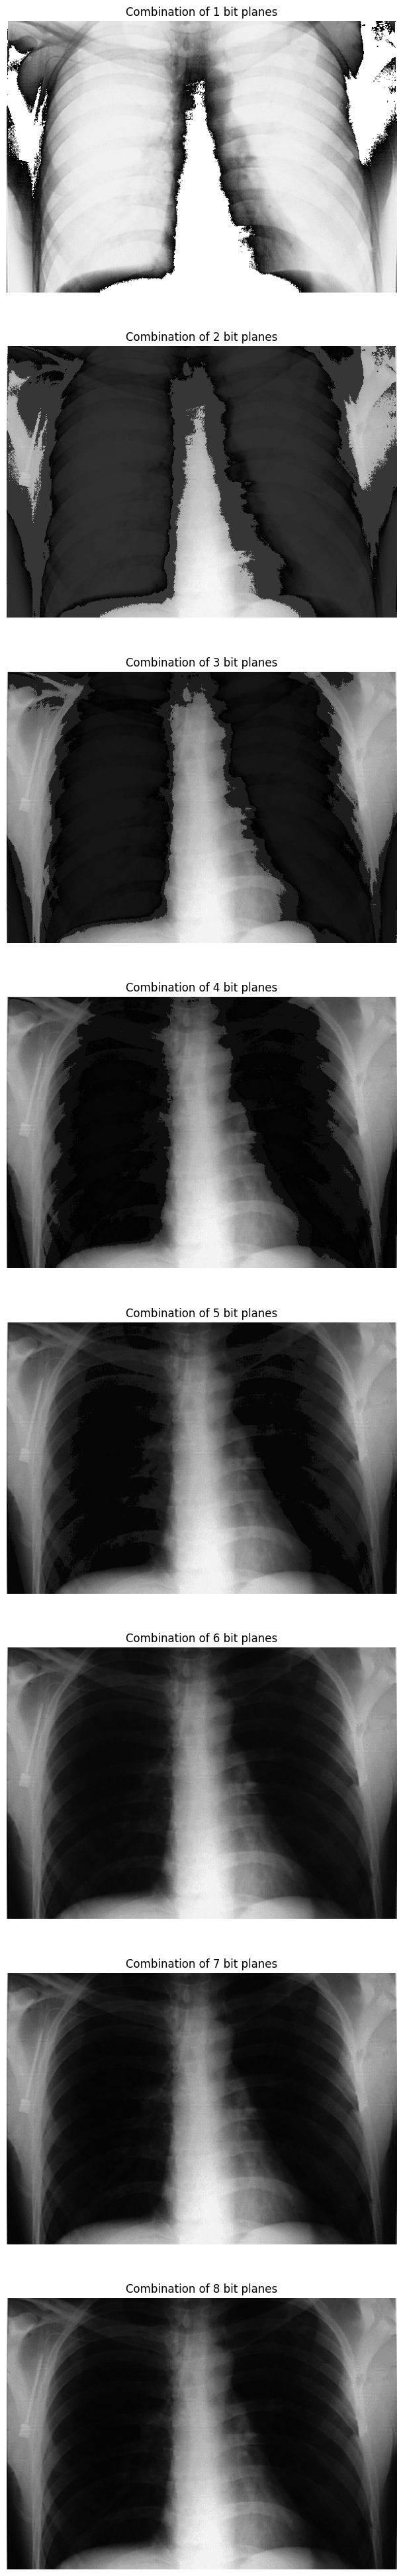

In [50]:
k = 0
fig, axes = plt.subplots(8, 1, figsize=(100, 50))

for j in range(8):
    axes[k].imshow(bit_images['bitplane' + str(7 - j)], cmap='gray')
    axes[k].axis('off')
    axes[k].set_title(f'Combination of {k + 1} bit planes')
    k = k + 1


After conducting comparisons, Its determined that employing 5 bit planes is sufficient for obtaining the image with minimal degradation in quality.
